In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
import os
import sys
import math
import time
sys.path.append('..')
from Framework.building_blocks import *
from Framework import datasets
from Framework.custom_sklearn_pipeline import *
from Framework.utils import *
from Framework.visualisation import *
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
import openml
#from openml import datasets
from openml import tasks
from openml import runs
from openml import flows
from openml import extensions
import shap

In [ ]:
X,y,name = datasets.returnDataset(8)
X = preprocessing.StandardScaler().fit_transform(X)
y = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X = pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
X_train.reset_index(inplace = True)
X_train.drop(['index'],axis = 1,inplace = True)
X_test.reset_index(inplace = True)
X_test.drop(['index'],axis = 1,inplace = True)

In [ ]:
notebook_mode = 'Original'
explainer_type = 'XGBoost'
model_type = 'XGBoost'
nClusters = 3

In [ ]:
def create_blocks(elems = 4):
    if elems == 5:
        processing_block = ProcessingBlock()
        explainer_block = ExplainerBlock(explainer_type)
        reduce_block = ReduceBlock(PCA(1))
        cluster_block = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
        ensemble_block = EnsembleBlock(model_type)
        return processing_block,explainer_block,reduce_block,cluster_block,ensemble_block
    else:
        processing_block = ProcessingBlock()
        explainer_block = ExplainerBlock(explainer_type)
        cluster_block = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
        ensemble_block = EnsembleBlock(model_type)
        return processing_block,explainer_block,cluster_block,ensemble_block

In [ ]:
processing_block = ProcessingBlock()
explainer_block = ExplainerBlock('XGBoost')
cluster_block = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
ensemble_block = EnsembleBlock(model_type)

processing_block2 = ProcessingBlock()
explainer_block2 = ExplainerBlock(explainer_type)
cluster_block2 = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
ensemble_block2 = EnsembleBlock(model_type)

processing_block3 = ProcessingBlock()
explainer_block3 = ExplainerBlock(explainer_type)
cluster_block3 = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
ensemble_block3 = EnsembleBlock(model_type)

processing_block4 = ProcessingBlock()
explainer_block4 = ExplainerBlock(explainer_type)
reduce_block4 = ReduceBlock(PCA(nClusters))
cluster_block4 = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
ensemble_block4 = EnsembleBlock(model_type)

In [ ]:
#X,X_test,y,y_test = train_test_split(X,y)
#X_train,X_val,y_train,y_val = processing_block.split_data(X,y,test_split=0.25)
#X.reset_index(inplace = True)
#X.drop(['index'],axis = 1,inplace = True)
#X_train.reset_index(inplace = True)
#X_train.drop(['index'],axis = 1,inplace = True)
#X_test.reset_index(inplace = True)
#X_test.drop(['index'],axis = 1,inplace = True)
processing_block4 = ProcessingBlock()
explainer_block4 = ExplainerBlock(explainer_type)
reduce_block4 = ReduceBlock(PCA(nClusters))
cluster_block4 = ClusterBlock(nClusters,KMeans(n_clusters = nClusters,random_state = 0),KNeighborsClassifier(n_neighbors = nClusters))
ensemble_block4 = EnsembleBlock(model_type)

In [ ]:
#shapley_values = explainer_block.fit_transform(X,y,X_train,y_train,X_val,y_val)

In [ ]:
#cluster_labels = cluster_block.cluster_training_instances(shapley_values)

In [ ]:
#ensemble_block.train(X_train,X_val,y_train,y_val,cluster_labels)

In [ ]:
#X_test,y_test = processing_block.prepare_test_data(X_test,y_test)

In [ ]:
#shapley_test = explainer_block.transform(X_test)

In [ ]:
#cluster_labels_test = cluster_block.cluster_test_instances(shapley_values,shapley_test)

In [ ]:
#y_pred = ensemble_block.predict(X_test,cluster_labels_test)

In [ ]:
#score = metrics.mean_squared_error(y_test,y_pred)
#score = math.sqrt(score)
#score

In [ ]:
s1 = S1_Branch_Pipeline(processing_block,explainer_block,cluster_block,ensemble_block)

In [ ]:
s1.fit(X,y)

In [ ]:
#y1_pred = s1.predict(X_test)

In [ ]:
s2 = S2_Branch_Pipeline(processing_block2,explainer_block2,cluster_block2,ensemble_block2)

In [ ]:
#s2.fit(X,y)

In [ ]:
#y2_pred = s2.predict(X_test)

In [ ]:
s7 = S7_Branch_Pipeline(processing_block3,explainer_block3,cluster_block3,ensemble_block3)

In [ ]:
#s3.fit(X,y)

In [ ]:
#y3_pred = s3.predict(X_test)

In [ ]:
s10 = S10_Branch_Pipeline(processing_block4,explainer_block4,reduce_block4,cluster_block4,ensemble_block4)

In [ ]:
#score1 = math.sqrt(metrics.mean_squared_error(y_test,y1_pred))
#score2 = math.sqrt(metrics.mean_squared_error(y_test,y2_pred))
#score3 = math.sqrt(metrics.mean_squared_error(y_test,y3_pred))

In [ ]:
#55.3494 -> score2

In [ ]:
#plt.bar(range(3),[score1,score2,score3])

In [ ]:
openml.config.apikey = '7be8de439f25368679e0802040791d1f'
sk_learn_ext = extensions.sklearn.SklearnExtension()
#task = tasks.get_task(52948)

In [ ]:
flow_s1 = sk_learn_ext.model_to_flow(s1)
#flow_s1.components['Building-Box-Model'].description = 'Thesis work v0.1'
flow_s1.components['processing_block'].description = 'Pre-process Block'
flow_s1.components['explainer_block'].description = 'Explainer Model'
flow_s1.components['cluster_block'].description = 'Clustering Models'
flow_s1.components['ensemble_block'].description = 'Ensemble Model'
flow_s1.description = s1.description
flow_s1
#run_s1 = runs.run_flow_on_task(flow_s1,task,avoid_duplicate_runs=False)

In [ ]:
flow_s2 = sk_learn_ext.model_to_flow(s2)
flow_s2.components['processing_block'].description = 'Pre-process Block'
flow_s2.components['explainer_block'].description = 'Explainer Model'
flow_s2.components['cluster_block'].description = 'Clustering Models'
flow_s2.components['ensemble_block'].description = 'Ensemble Model'
flow_s2.description = s2.description
flow_s2.components
#run_s2 = runs.run_flow_on_task(flow_s2,task,avoid_duplicate_runs=False)

In [ ]:
flow_s7 = sk_learn_ext.model_to_flow(s7)
flow_s7.components['processing_block'].description = 'Pre-process Block'
flow_s7.components['explainer_block'].description = 'Explainer Model'
flow_s7.components['cluster_block'].description = 'Clustering Models'
flow_s7.components['ensemble_block'].description = 'Ensemble Model'
flow_s7.description = s7.description
flow_s7.components

In [ ]:
flow_s10 = sk_learn_ext.model_to_flow(s10)
flow_s10.components['processing_block'].description = 'Pre-process Block'
flow_s10.components['explainer_block'].description = 'Explainer Model'
flow_s10.components['cluster_block'].description = 'Clustering Models'
flow_s10.components['ensemble_block'].description = 'Ensemble Model'
flow_s10.components['reduce_block'].description = 'Dimensionality Reduction Model'
flow_s10.description = s10.description
flow_s10

In [ ]:

#score1 = run_s1.get_metric_fn(metrics.mean_squared_error).min()

#score2 = run_s2.get_metric_fn(metrics.mean_squared_error).min()

#score7 = run_s7.get_metric_fn(metrics.mean_squared_error).min()

#score10 = run_s10.get_metric_fn(metrics.mean_squared_error).min()

In [ ]:
#plt.bar(range(4),[score1,score2,score7,score10])

In [ ]:
#task_dict = openml.tasks.list_tasks(task_type_id=2)

In [ ]:
#task_list = pd.DataFrame.from_dict(task_dict, orient='index') 

In [ ]:
#task_list =task_list[task_list['NumberOfInstancesWithMissingValues'] == 0.0]

In [ ]:
#
#211692 -> analcat_data - regression-holdout set
#211693 -> detroit - regression-holdout set

In [ ]:
#task_list.head(20)
task_no = 211696
tasks.get_task(task_no)

In [ ]:
from sklearn import metrics
m1_scores = []
for i in [1]:
       #   ,2,3,4,5,8,11,12]:
    print('Running task {}'.format(i))
    run = runs.run_flow_on_task(flow_s1, tasks.get_task(task_no),avoid_duplicate_runs = False)
    #myrun = run.publish()
    score = run.get_metric_fn(metrics.mean_squared_error)
    m1_scores.append(score.mean())
#myrun

In [ ]:
m1_scores

In [ ]:
m2_scores = []
for i in [1]:
#,2,3,4,5,8,11,12]:
    print('Running task {}'.format(i))
    run = runs.run_flow_on_task(flow_s2, tasks.get_task(task_no),avoid_duplicate_runs = False)
    #myrun = run.publish()
    score = run.get_metric_fn(metrics.mean_squared_error)
    m2_scores.append(score.mean())
#myrun

In [ ]:
m7_scores = []
for i in [1]:
#,2,3,4,5,8,11,12]:
    print('Running task {}'.format(i))
    run = runs.run_flow_on_task(flow_s7, tasks.get_task(task_no),avoid_duplicate_runs = False)
    #myrun = run.publish()
    score = run.get_metric_fn(metrics.mean_squared_error)
    m7_scores.append(score.mean())
#myrun

In [ ]:
m10_scores = []
for i in [1]:
          #,2,3,4,5,8,11,12]:
    print('Running task {}'.format(i))
    run = runs.run_flow_on_task(flow_s10, tasks.get_task(task_no),avoid_duplicate_runs = False)
    #myrun = run.publish()
    score = run.get_metric_fn(metrics.mean_squared_error)
    m10_scores.append(score.mean())
#myrun

In [ ]:
#import seaborn as sns
m1_scores

In [ ]:
score_df = pd.DataFrame([m1_scores,m2_scores,m7_scores,m10_scores],index = ['S1','S2', 'S7', 'S10']).transpose()

In [ ]:
score_df

In [ ]:
#sns.barplot(y = score_df.index,hue = score_df.columns,data = score_df)

In [ ]:
#score_melted = pd.melt(score_df)
#score_melted

In [ ]:
#sns.barplot(y = 'value',hue = 'variable',data = score_melted)

In [ ]:
dataset_list = list(range(26))
dataset_list.pop(19)
dataset_list.pop(18)
dataset_list

In [ ]:
X,y,name = datasets.returnDataset(17)
name

In [ ]:
for i in dataset_list:
    for nC in [2,3,4,5]:
        timings = []
        X,y,name = datasets.returnDataset(i)
        #X = preprocessing.StandardScaler().fit_transform(X)
        #y = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
        #X = pd.DataFrame(X)
        #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
        #X_train.reset_index(inplace = True)
        #X_train.drop(['index'],axis = 1,inplace = True)
        #X_test.reset_index(inplace = True)
        #X_test.drop(['index'],axis = 1,inplace = True)

        X_train,X_test,y_train,y_test = prepare_pipeline_data(X,y)
        notebook_mode = 'Original'
        explainer_type = 'XGBoost'
        model_type = 'XGBoost'
        nClusters = nC

        processing_block1,explainer_block1,cluster_block1,ensemble_block1 = create_blocks(elems = 4)
        explainer_block1.explainer_type = 'XGBoost'
        
        processing_block2,explainer_block2,cluster_block2,ensemble_block2 = create_blocks(elems = 4)
        
        processing_block6,explainer_block6,cluster_block6,ensemble_block6 = create_blocks(elems = 4)
        
        processing_block7,explainer_block7,cluster_block7,ensemble_block7 = create_blocks(elems = 4)
        
        processing_block10,explainer_block10,reduce_block10,cluster_block10,ensemble_block10 = create_blocks(elems = 5)
        
        processing_block11,explainer_block11,reduce_block11,cluster_block11,ensemble_block11 = create_blocks(elems = 5)

        s1 = S1_Branch_Pipeline(processing_block1,explainer_block1,cluster_block1,ensemble_block1)
        s2 = S2_Branch_Pipeline(processing_block2,explainer_block2,cluster_block2,ensemble_block2)
        s6 = S6_Branch_Pipeline(processing_block6,explainer_block6,cluster_block6,ensemble_block6)
        s7 = S7_Branch_Pipeline(processing_block7,explainer_block7,cluster_block7,ensemble_block7)
        s10 = S10_Branch_Pipeline(processing_block10,explainer_block10,reduce_block10,cluster_block10,ensemble_block10)
        s11 = S11_Branch_Pipeline(processing_block11,explainer_block11,reduce_block11,cluster_block11,ensemble_block11)

        start_time = time.time()
        s1.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s1_y = s1.predict(X_test)
        
        
        start_time = time.time()
        s2.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s2_y = s2.predict(X_test)
        
        
        start_time = time.time()
        s6.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s6_y = s6.predict(X_test)
        
        
        start_time = time.time()
        s7.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s7_y = s7.predict(X_test)
        
        
        start_time = time.time()
        s10.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s10_y = s10.predict(X_test)
        
        
        start_time = time.time()
        s11.fit(X_train,y_train)
        timings.append(time.time() - start_time)
        s11_y = s11.predict(X_test)
        
        
        s1_err = math.sqrt(metrics.mean_squared_error(y_test,s1_y))
        s2_err = math.sqrt(metrics.mean_squared_error(y_test,s2_y))
        s6_err = math.sqrt(metrics.mean_squared_error(y_test,s6_y))
        s7_err = math.sqrt(metrics.mean_squared_error(y_test,s7_y))
        s10_err = math.sqrt(metrics.mean_squared_error(y_test,s10_y))
        s11_err = math.sqrt(metrics.mean_squared_error(y_test,s11_y))

        s1_params,s1_estimator,s1_avg_nodes = s1.calculate_complexity()
        s2_params,s2_estimator,s2_avg_nodes = s2.calculate_complexity()
        s6_params,s6_estimator,s6_avg_nodes = s6.calculate_complexity()
        s7_params,s7_estimator,s7_avg_nodes = s7.calculate_complexity()
        s10_params,s10_estimator,s10_avg_nodes = s10.calculate_complexity()
        s11_params,s11_estimator,s11_avg_nodes = s11.calculate_complexity()
        
        values = [s1_err,s2_err,s6_err,s7_err,s10_err,s11_err]
        f=open("../Data/test_six_branch.txt", "a+")
        f.write(name + ',')
        [f.write('{0:.3f},'.format(values[v])) for v in range(len(values))]
        f.write('{0},'.format(nClusters))
        f.write('{0},'.format(notebook_mode))
        f.write('{0},'.format(explainer_type))
        f.write('{0}'.format(model_type))
        f.write('\n')
        f.close()
        
        f=open("../Data/test_runtime.txt", "a+")
        f.write(name + ',')
        [f.write('{0:.3f},'.format(v)) for v in timings]
        f.write('{0}'.format(nClusters))
        f.write('\n')
        f.close()
        
        params = [s1_params,s1_estimator,s1_avg_nodes,s2_params,s2_estimator,s2_avg_nodes,
                  s6_params,s6_estimator,s6_avg_nodes,s7_params,s7_estimator,s7_avg_nodes,
                  s10_params,s10_estimator,s10_avg_nodes,s11_params,s11_estimator,s11_avg_nodes]
        f=open("../Data/test_complexity.txt", "a+")
        f.write(name + ',')
        [f.write('{0:.3f},'.format(v)) for v in params]
        f.write('{0}'.format(nClusters))
        f.write('\n')
        f.close()

In [ ]:
dts = openml.datasets.get_dataset(688)

In [ ]:
dt,_,_,_ = dts.get_data()

In [ ]:
dt.iloc[:,-1]

In [ ]:
xgbdf = s10.explainer_block.base_model.trees_to_dataframe()
xgbdf2 = s10.ensemble_block.model_dict

In [ ]:
xgbdf2['model0'].trees_to_dataframe()

In [ ]:
sum([xgbdf2['model{}'.format(i)].trees_to_dataframe().shape[0] for i in range(len(xgbdf2))])

In [ ]:
s1_tree = s1.explainer_block.base_model.trees_to_dataframe()

In [ ]:
tree_node_avg = s1_tree.groupby('Tree')['Node'].count()

In [ ]:
s1.calculate_complexity()

In [ ]:
s1.n_avg_nodes

In [ ]:
import math
math.sqrt(1600000000)

In [ ]:
for i in dataset_list[:5]:
    for nC in [1,2,3,4,5]:
        errors = []
        X,y,name = datasets.returnDataset(i)
        #X = preprocessing.StandardScaler().fit_transform(X)
        #y = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
        #X = pd.DataFrame(X)
        #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
        #X_train.reset_index(inplace = True)
        #X_train.drop(['index'],axis = 1,inplace = True)
        #X_test.reset_index(inplace = True)
        #X_test.drop(['index'],axis = 1,inplace = True)
        for exp in ['Linear','XGBoost']:
            for mod_type in ['Linear', 'XGBoost']:
                for rand_state in [0,3,13,42,314]:

                    temp_errors1 = []
                    temp_errors2 = []
                    temp_errors6 = []
                    temp_errors7 = []
                    temp_errors10 = []
                    temp_errors11 = []

                    X_train,X_test,y_train,y_test = prepare_pipeline_data(X,y,random_state = rand_state)
                    notebook_mode = 'Original'
                    explainer_type = exp
                    model_type = mod_type
                    nClusters = nC

                    #processing_block1,explainer_block1,cluster_block1,ensemble_block1 = create_blocks(elems = 4)
                    #explainer_block1.explainer_type = 'XGBoost'

                    #processing_block2,explainer_block2,cluster_block2,ensemble_block2 = create_blocks(elems = 4)

                    #processing_block6,explainer_block6,cluster_block6,ensemble_block6 = create_blocks(elems = 4)

                    processing_block7,explainer_block7,cluster_block7,ensemble_block7 = create_blocks(elems = 4)

                    #processing_block10,explainer_block10,reduce_block10,cluster_block10,ensemble_block10 = create_blocks(elems = 5)

                    #processing_block11,explainer_block11,reduce_block11,cluster_block11,ensemble_block11 = create_blocks(elems = 5)

                    #s1 = S1_Branch_Pipeline(processing_block1,explainer_block1,cluster_block1,ensemble_block1)
                    #s2 = S2_Branch_Pipeline(processing_block2,explainer_block2,cluster_block2,ensemble_block2)
                    #s6 = S6_Branch_Pipeline(processing_block6,explainer_block6,cluster_block6,ensemble_block6)
                    s7 = S7_Branch_Pipeline(processing_block7,explainer_block7,cluster_block7,ensemble_block7)
                    #s10 = S10_Branch_Pipeline(processing_block10,explainer_block10,reduce_block10,cluster_block10,ensemble_block10)
                    #s11 = S11_Branch_Pipeline(processing_block11,explainer_block11,reduce_block11,cluster_block11,ensemble_block11)

                    start_time = time.time()
                    #s1.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    #s1_y = s1.predict(X_test)


                    start_time = time.time()
                    #s2.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    #s2_y = s2.predict(X_test)


                    start_time = time.time()
                    #s6.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    #s6_y = s6.predict(X_test)


                    start_time = time.time()
                    s7.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    s7_y = s7.predict(X_test)


                    start_time = time.time()
                    #s10.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    #s10_y = s10.predict(X_test)


                    start_time = time.time()
                    #s11.fit(X_train,y_train)
                    #timings.append(time.time() - start_time)
                    #s11_y = s11.predict(X_test)


                    #s1_err = math.sqrt(metrics.mean_squared_error(y_test,s1_y))
                    #temp_errors1.append(s1_err)
                    #s2_err = math.sqrt(metrics.mean_squared_error(y_test,s2_y))
                    #temp_errors2.append(s2_err)
                    #s6_err = math.sqrt(metrics.mean_squared_error(y_test,s6_y))
                    #temp_errors6.append(s6_err)
                    s7_err = math.sqrt(metrics.mean_squared_error(y_test,s7_y))
                    temp_errors7.append(s7_err)
                    #s10_err = math.sqrt(metrics.mean_squared_error(y_test,s10_y))
                    #temp_errors10.append(s10_err)
                    #s11_err = math.sqrt(metrics.mean_squared_error(y_test,s11_y))
                    #temp_errors11.append(s11_err)

                    #s1_params,s1_estimator,s1_avg_nodes = s1.calculate_complexity()
                    #s2_params,s2_estimator,s2_avg_nodes = s2.calculate_complexity()
                    #s6_params,s6_estimator,s6_avg_nodes = s6.calculate_complexity()
                    #s7_params,s7_estimator,s7_avg_nodes = s7.calculate_complexity()
                    #s10_params,s10_estimator,s10_avg_nodes = s10.calculate_complexity()
                    #s11_params,s11_estimator,s11_avg_nodes = s11.calculate_complexity()
                #errors.append([np.min(temp_errors1),np.min(temp_errors2),np.min(temp_errors6),np.min(temp_errors7),np.min(temp_errors10),np.min(temp_errors11)])
                errors.append(np.min(temp_errors7))
        values = errors
        f=open("../Data/branch5-configurations.txt", "a+")
        f.write(name + ',')
        #f.write('{0}-{1}'.format(explainer_type,model_type))
        #f.write('{0}'.format(model_type))
        [f.write('{0:.3f},'.format(values[v])) for v in range(len(values))]
        f.write('{0}'.format(nClusters))
        #f.write('{0},'.format(notebook_mode))
        #f.write('{0},'.format(explainer_type))
        #f.write('{0}'.format(model_type))
        f.write('\n')
        f.close()
        
        #f=open("../Data/test_runtime.txt", "a+")
        #f.write(name + ',')
        #[f.write('{0:.3f},'.format(v)) for v in timings]
        #f.write('{0}'.format(nClusters))
        #f.write('\n')
        #f.close()
        
        #params = [s1_params,s1_estimator,s1_avg_nodes,s2_params,s2_estimator,s2_avg_nodes,
        #          s6_params,s6_estimator,s6_avg_nodes,s7_params,s7_estimator,s7_avg_nodes,
        #          s10_params,s10_estimator,s10_avg_nodes,s11_params,s11_estimator,s11_avg_nodes]
        #f=open("../Data/test_complexity.txt", "a+")
        #f.write(name + ',')
        #[f.write('{0:.3f},'.format(v)) for v in params]
        #f.write('{0}'.format(nClusters))
        #f.write('\n')
        #f.close()

In [2]:
import pandas as pd
config_data = pd.read_csv('../Data/branch5-configurations.txt')

In [7]:
config_best = set_branch_best(config_data,'C1-Linear-Linear','C2-Linear-XGB','C3-XGB-Linear','C4-XGB-XGB')

C:\Users\koral\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
config_best_grouped = config_best.groupby('Dataset_name').min()

In [31]:
config_best_grouped['Winner'] = config_best_grouped.apply(lambda x: x.idxmin(),axis = 1)

In [10]:
print(config_best_grouped.to_latex(index=True))  

\begin{tabular}{lrrrrl}
\toprule
{} &  C1-Linear-Linear &  C2-Linear-XGB &  C3-XGB-Linear &  C4-XGB-XGB &            Winner \\
Dataset\_name    &                   &                &                &             &                   \\
\midrule
Admissions      &             0.058 &          0.073 &          0.058 &       0.077 &  C1-Linear-Linear \\
Amazon          &           186.813 &        161.275 &        180.738 &     163.930 &     C2-Linear-XGB \\
Auto Price      &          2396.768 &       1053.687 &      36230.300 &    1117.791 &     C2-Linear-XGB \\
Balloon         &             0.072 &          0.074 &          0.072 &       0.075 &  C1-Linear-Linear \\
Banking Data    &             0.082 &          0.083 &          0.082 &       0.084 &  C1-Linear-Linear \\
Boston          &             3.330 &          3.100 &          4.879 &       3.806 &     C2-Linear-XGB \\
CPU Activity    &             3.095 &          2.612 &          3.052 &       2.508 &        C4-XGB-XGB \\
Crime  

In [32]:
config_best_grouped.reset_index(inplace = True)
config_winners = config_best_grouped.groupby('Winner')['Dataset_name'].count().reset_index()

In [33]:
config_winners.columns = ['Configurations','Number of times resulted in lowest RMSE']

In [34]:
config_winners

,Configurations,Number of times resulted in lowest RMSE
0,C1-Linear-Linear,6
1,C2-Linear-XGB,10
2,C3-XGB-Linear,2
3,C4-XGB-XGB,6


In [36]:
config_winners.loc[2,'Number of times resulted in lowest RMSE'] = 5
config_winners.loc[3,'Number of times resulted in lowest RMSE'] = 8
print(config_winners.to_latex())

\begin{tabular}{llr}
\toprule
{} &    Configurations &  Number of times resulted in lowest RMSE \\
\midrule
0 &  C1-Linear-Linear &                                        6 \\
1 &     C2-Linear-XGB &                                       10 \\
2 &     C3-XGB-Linear &                                        5 \\
3 &        C4-XGB-XGB &                                        8 \\
\bottomrule
\end{tabular}



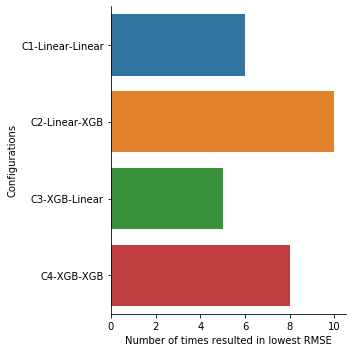

In [40]:
import seaborn as sns
sns.catplot(y = 'Configurations', x = 'Number of times resulted in lowest RMSE', data = config_winners,kind = 'bar')

In [ ]:
reduced_shap = []
reduced_norm = []
dataset_names = []
for i in dataset_list:
    X,y,name = datasets.returnDataset(i)
    dataset_names.append(name)
    explainer_block = ExplainerBlock('Linear')
    reduce_block = ReduceBlock(PCA(2))
    reduce_block_shap = ReduceBlock(PCA(2))
    X_shap = explainer_block.fit_transform(X,y,X,y,X,y)
    X_red = reduce_block.fit_transform(X)
    X_red_shap = reduce_block_shap.fit_transform(X_shap)
    reduced_norm.append(X_red.shape)
    reduced_shap.append(X_red_shap.shape)

In [ ]:
reduced_shap

In [ ]:
reduced_norm

In [ ]:
shap_dim = np.array([el[1] for el in reduced_shap])
norm_dim = np.array([el[1] for el in reduced_norm])


In [ ]:
shap_dim

In [ ]:
norm_dim.shape

In [ ]:
norm_dim[norm_dim < shap_dim].shape

In [ ]:
df = pd.DataFrame([shap_dim,norm_dim],columns = dataset_names).transpose()
df.columns = ['PCA w/ Original Features','PCA w/ Shapley values']
df

In [ ]:
data_stats = dataset_stats(26)

In [ ]:
data_df = pd.DataFrame.from_dict(data_stats).transpose()

In [ ]:
data_df = data_df.drop('Coil2000')
data_df = data_df.drop('Online News')

In [ ]:
data_df

In [ ]:
df['Features'] = data_df['Features']
df

In [ ]:
print(df.to_latex())

In [ ]:
df['Vs_results'] = df.apply(lambda x : label_vs_triple(x,[df.columns[0],df.columns[1]]) ,axis = 1)

In [ ]:
df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

ax = sns.scatterplot(x = 'Instances',y = 'Features' , hue = 'Vs_results', data = df)
#ax.grid(alpha = 0)
plt.savefig('benchmark-pca.png', transparent=True)

In [ ]:
df.columns = ['PCA w/ Original Features', 'PCA w/ Shapley values', 'Instances',
       'Features', 'Method']